In [1]:
# Kütüphaneleri Yükleme
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Google drive 'a bağlanma
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# CSV dosyasını okuma
df = pd.read_csv("/content/drive/MyDrive/PythonDonemOdevi/Auto-Sales-data.csv")
# Veri setinin ilk satırını görüntüleme
print(df.head(1))

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  \
0        10107               30       95.7                2  2871.0   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   

        CUSTOMERNAME       PHONE             ADDRESSLINE1 CITY POSTALCODE  \
0  Land of Toys Inc.  2125557818  897 Long Airport Avenue  NYC      10022   

  COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0     USA              Yu             Kwai    Small  


In [4]:
# Veri setindeki sütun isimlerini görüntüleme
columnValues = list(df.columns.values)
print(columnValues)
# Veri setindeki eksik değer sayısını kontrol etme
df.isnull().sum()#hiç null satır bulunmadı.

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [5]:
# Veri setinin boyutları ve özellik sayısını görüntüleme
print(f"Veri setinde bulunan verilerin sayısı:  {df.shape[0]}\nVeri özellik sayısı: {df.shape[1]}")

Veri setinde bulunan verilerin sayısı:  2747
Veri özellik sayısı: 20


In [6]:
# Veri setindeki veri tiplerini görüntüleme
print("Veri setindeki verilerin Tipleri:")
print(df.dtypes)

Veri setindeki verilerin Tipleri:
ORDERNUMBER               int64
QUANTITYORDERED           int64
PRICEEACH               float64
ORDERLINENUMBER           int64
SALES                   float64
ORDERDATE                object
DAYS_SINCE_LASTORDER      int64
STATUS                   object
PRODUCTLINE              object
MSRP                      int64
PRODUCTCODE              object
CUSTOMERNAME             object
PHONE                    object
ADDRESSLINE1             object
CITY                     object
POSTALCODE               object
COUNTRY                  object
CONTACTLASTNAME          object
CONTACTFIRSTNAME         object
DEALSIZE                 object
dtype: object


<ipython-input-7-24b10ad87f44>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


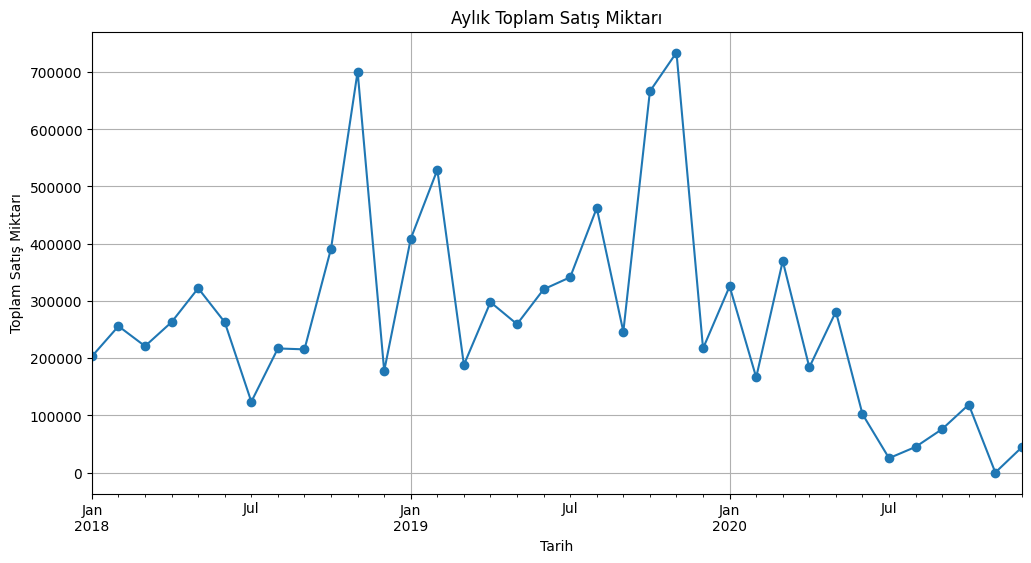

In [7]:
# 'ORDERDATE' sütununu tarih formatına dönüştürme ve indeks olarak ayarlama
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df = df.set_index('ORDERDATE')

# Aylık toplam satış miktarını gösteren çizgi grafiği
plt.figure(figsize=(12, 6))
df['SALES'].resample('M').sum().plot(marker='o')
plt.xlabel('Tarih')
plt.ylabel('Toplam Satış Miktarı')
plt.title('Aylık Toplam Satış Miktarı')
plt.grid(True)
plt.show()


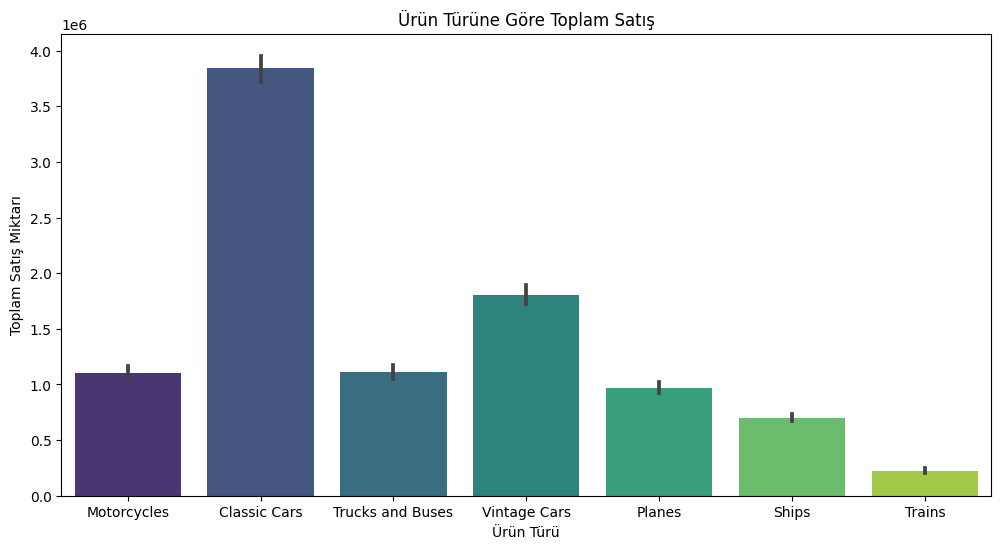

In [8]:
# Ürün türüne göre toplam satış miktarını gösteren çubuk grafiği
plt.figure(figsize=(12, 6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=df, estimator=sum, palette='viridis')
plt.xlabel('Ürün Türü')
plt.ylabel('Toplam Satış Miktarı')
plt.title('Ürün Türüne Göre Toplam Satış')
plt.show()

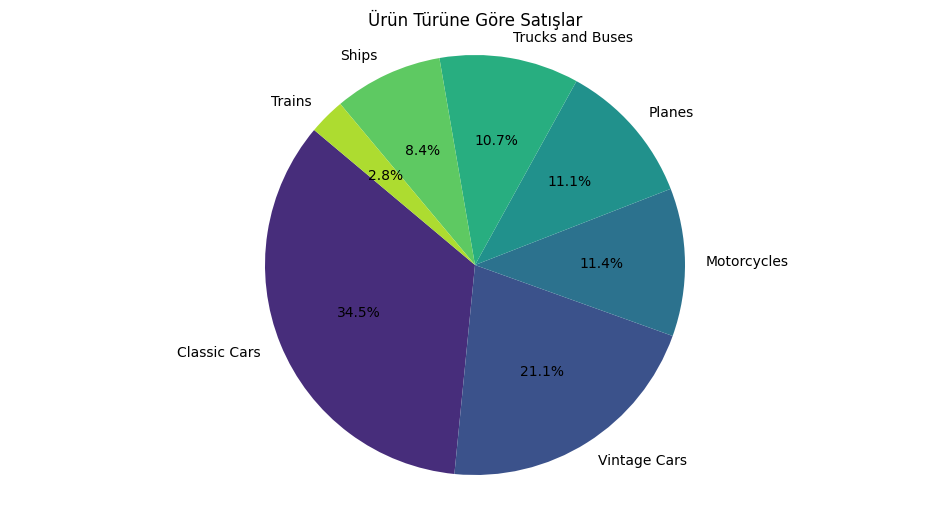

In [9]:
# Ürün türüne göre satışların yüzdelik dilimleriyle pasta grafiği
product_line_counts = df['PRODUCTLINE'].value_counts()
plt.figure(figsize=(12, 6))
colors = sns.color_palette('viridis', n_colors=len(product_line_counts))
plt.pie(product_line_counts, labels=product_line_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Ürün Türüne Göre Satışlar')
plt.show()


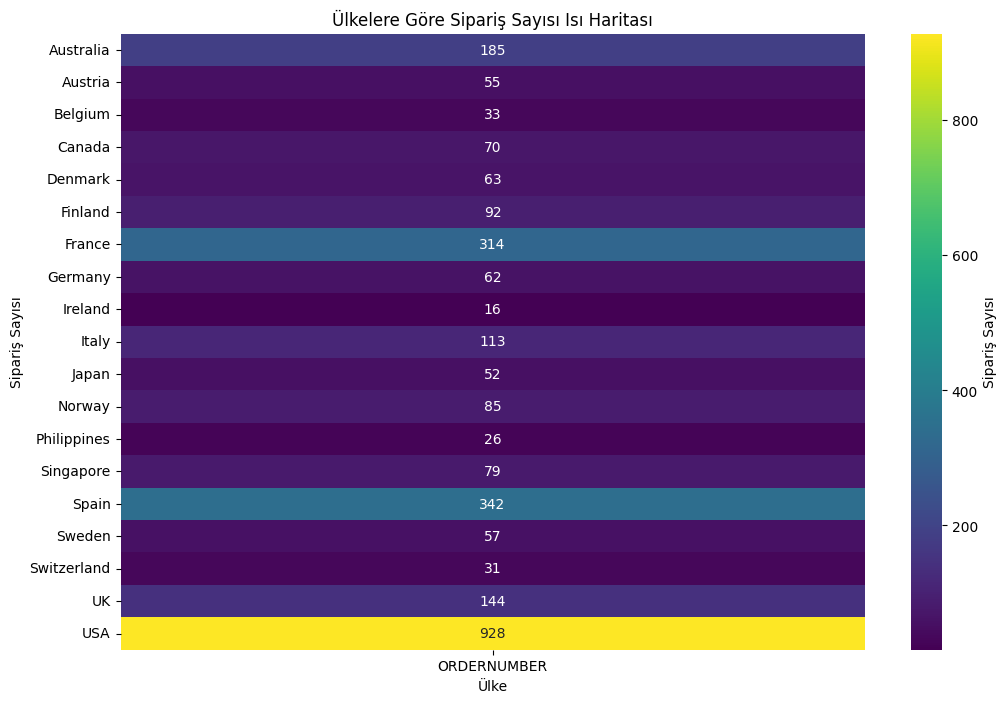

In [10]:
# Ülkelere göre sipariş sayılarını gösteren ısı haritası
order_count_by_country = df.pivot_table(index='COUNTRY', values='ORDERNUMBER', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(order_count_by_country, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Sipariş Sayısı'})
plt.xlabel('Ülke')
plt.ylabel('Sipariş Sayısı')
plt.title('Ülkelere Göre Sipariş Sayısı Isı Haritası')
plt.show()


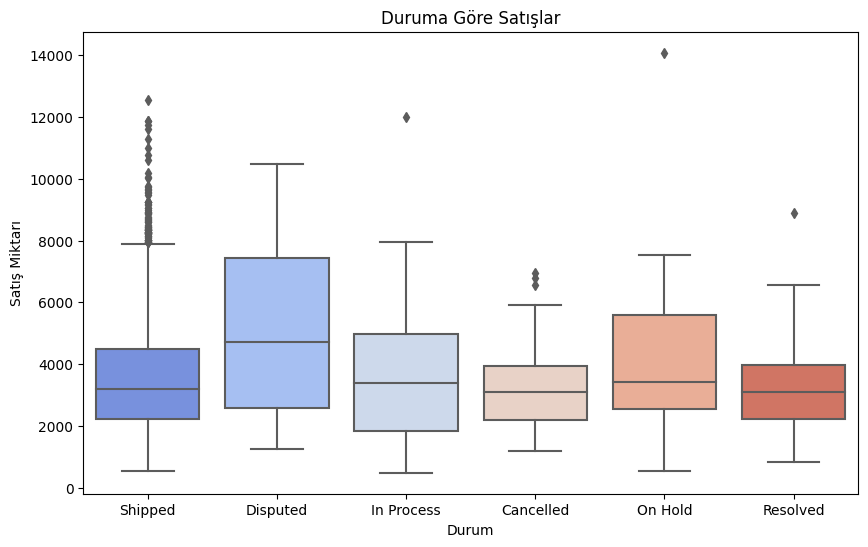

In [11]:
# Sipariş durumlarına göre satışların kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', y='SALES', data=df, palette='coolwarm')
plt.xlabel('Durum')
plt.ylabel('Satış Miktarı')
plt.title('Duruma Göre Satışlar')
plt.show()

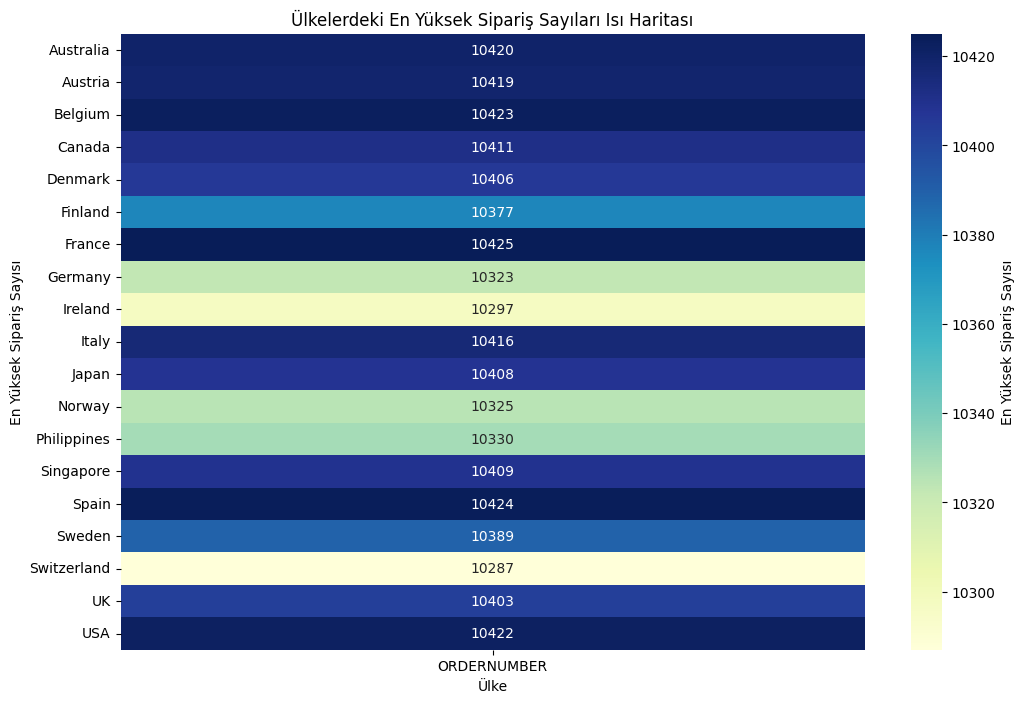

In [12]:
# Her bir ülkedeki en yüksek sipariş sayısını içeren bir tablo oluştur
max_order_by_country = df.pivot_table(index='COUNTRY', values='ORDERNUMBER', aggfunc='max')
# Isı haritasını çizerek en yüksek sipariş sayılarını gösterme
plt.figure(figsize=(12, 8))
sns.heatmap(max_order_by_country, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'En Yüksek Sipariş Sayısı'})
plt.xlabel('Ülke')
plt.ylabel('En Yüksek Sipariş Sayısı')
plt.title('Ülkelerdeki En Yüksek Sipariş Sayıları Isı Haritası')
plt.show()


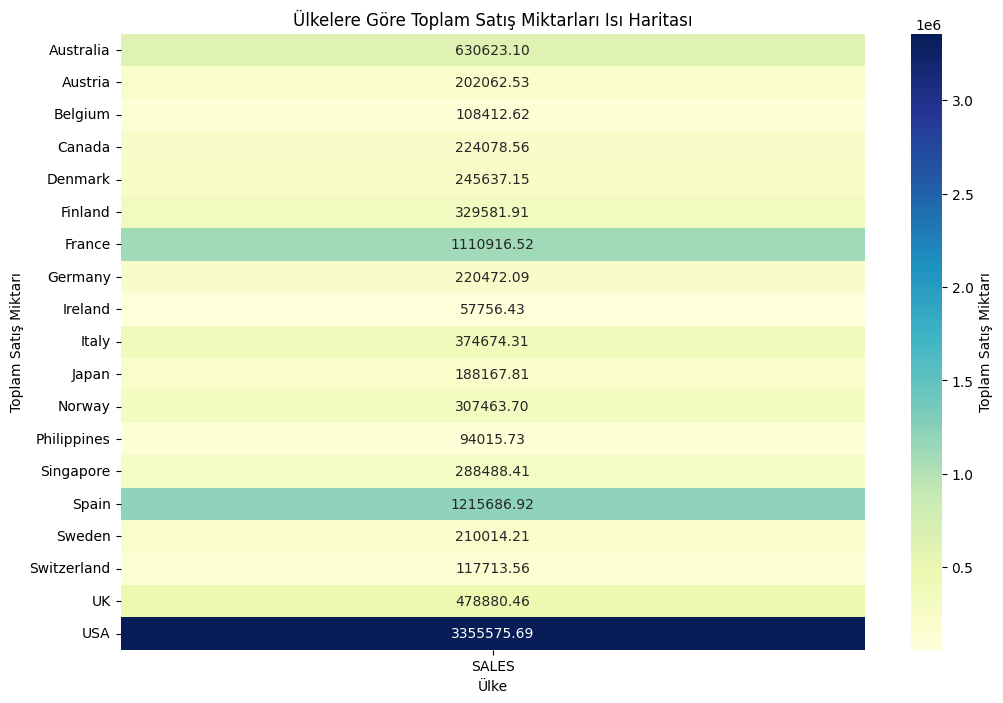

In [13]:
# Her bir ülkedeki toplam satış miktarını içeren bir tablo oluştur
sales_by_country = df.pivot_table(index='COUNTRY', values='SALES', aggfunc='sum')

# Isı haritasını çizerek toplam satış miktarlarını gösterme
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_country, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Toplam Satış Miktarı'})
plt.xlabel('Ülke')
plt.ylabel('Toplam Satış Miktarı')
plt.title('Ülkelere Göre Toplam Satış Miktarları Isı Haritası')
plt.show()


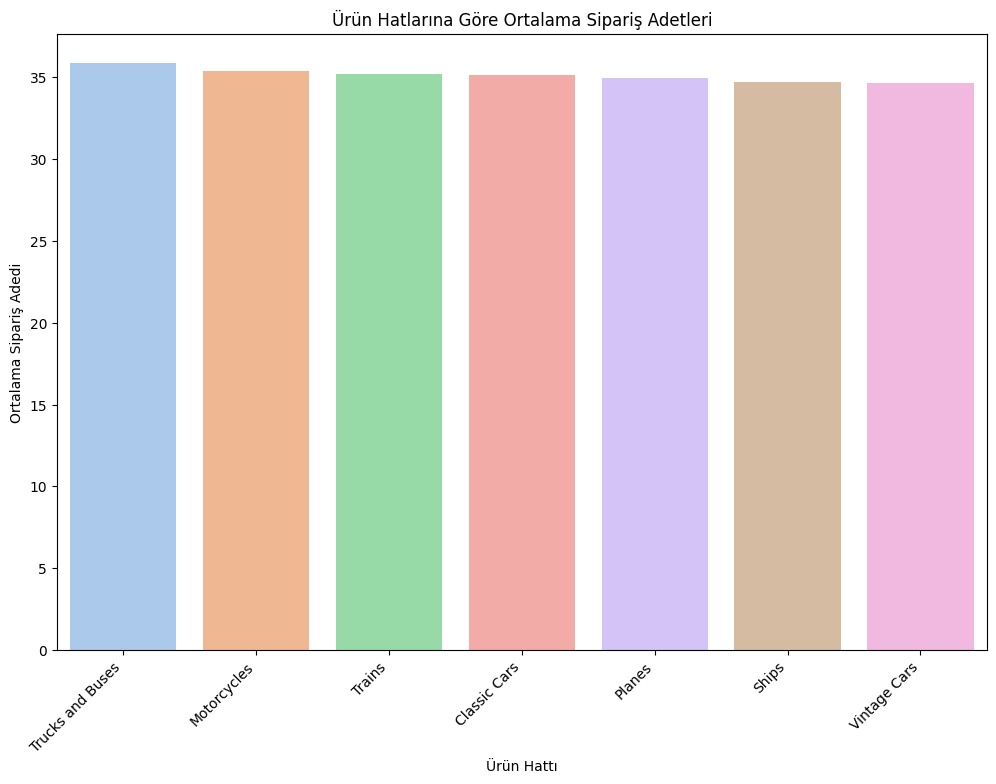

In [14]:
# Her bir ürün hattına göre ortalama sipariş adedini hesapla ve sırala
avg_quantity_by_product_line = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_quantity_by_product_line.index, y=avg_quantity_by_product_line.values, palette='pastel')
# Çubuk grafiği çizerek ortalama sipariş adetlerini gösterme
plt.xlabel('Ürün Hattı')
plt.ylabel('Ortalama Sipariş Adedi')
plt.title('Ürün Hatlarına Göre Ortalama Sipariş Adetleri')
plt.xticks(rotation=45, ha='right')
plt.show()



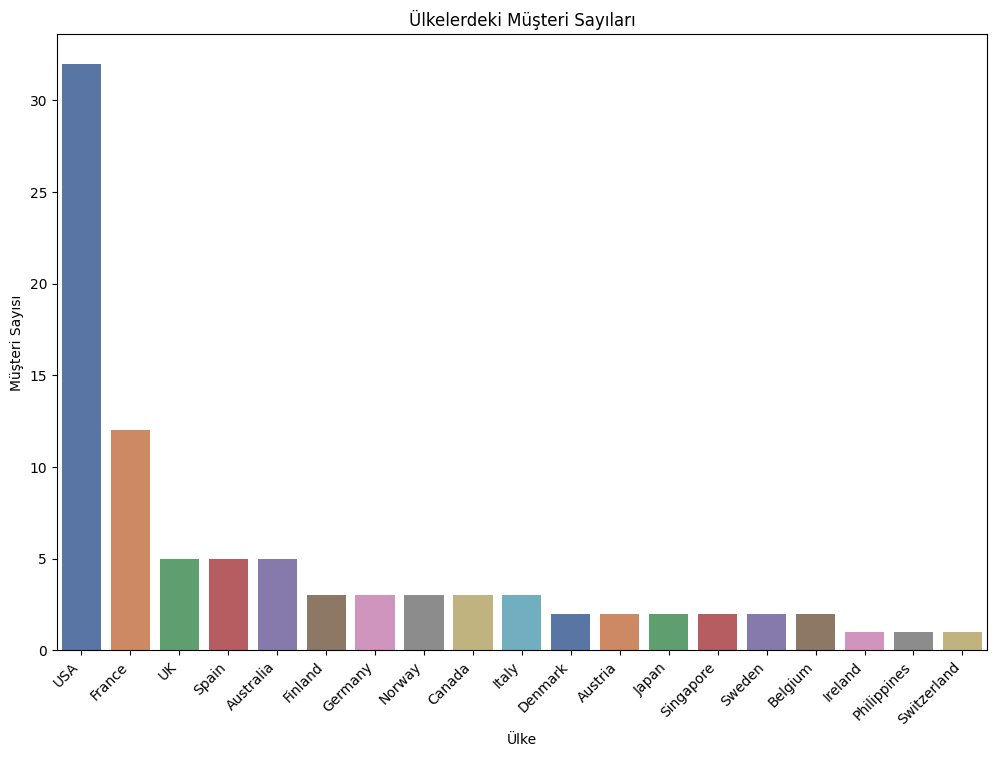

In [15]:
# Her bir ülkedeki benzersiz müşteri sayısını hesapla ve sırala
customer_count_by_country = df.groupby('COUNTRY')['CUSTOMERNAME'].nunique().sort_values(ascending=False)

# Çubuk grafiği çizerek müşteri sayılarını gösterme
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_count_by_country.index, y=customer_count_by_country.values, palette='deep')
plt.xlabel('Ülke')
plt.ylabel('Müşteri Sayısı')
plt.title('Ülkelerdeki Müşteri Sayıları')
plt.xticks(rotation=45, ha='right')
plt.show()



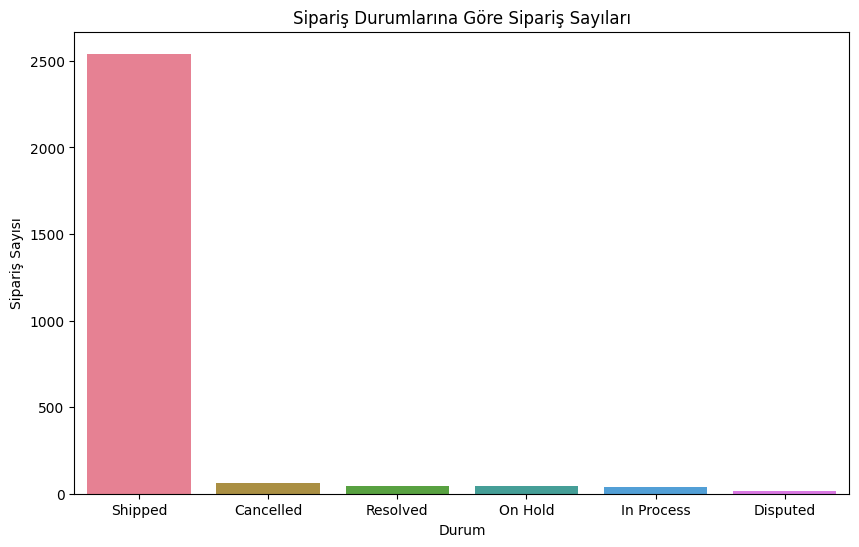

In [16]:
# Sipariş durumlarına göre sipariş sayısını hesapla ve sırala
order_count_by_status = df.groupby('STATUS')['ORDERNUMBER'].count().sort_values(ascending=False)

# Çubuk grafiği çizerek sipariş sayılarını gösterme
plt.figure(figsize=(10, 6))
sns.barplot(x=order_count_by_status.index, y=order_count_by_status.values, palette='husl')
plt.xlabel('Durum')
plt.ylabel('Sipariş Sayısı')
plt.title('Sipariş Durumlarına Göre Sipariş Sayıları')
plt.show()


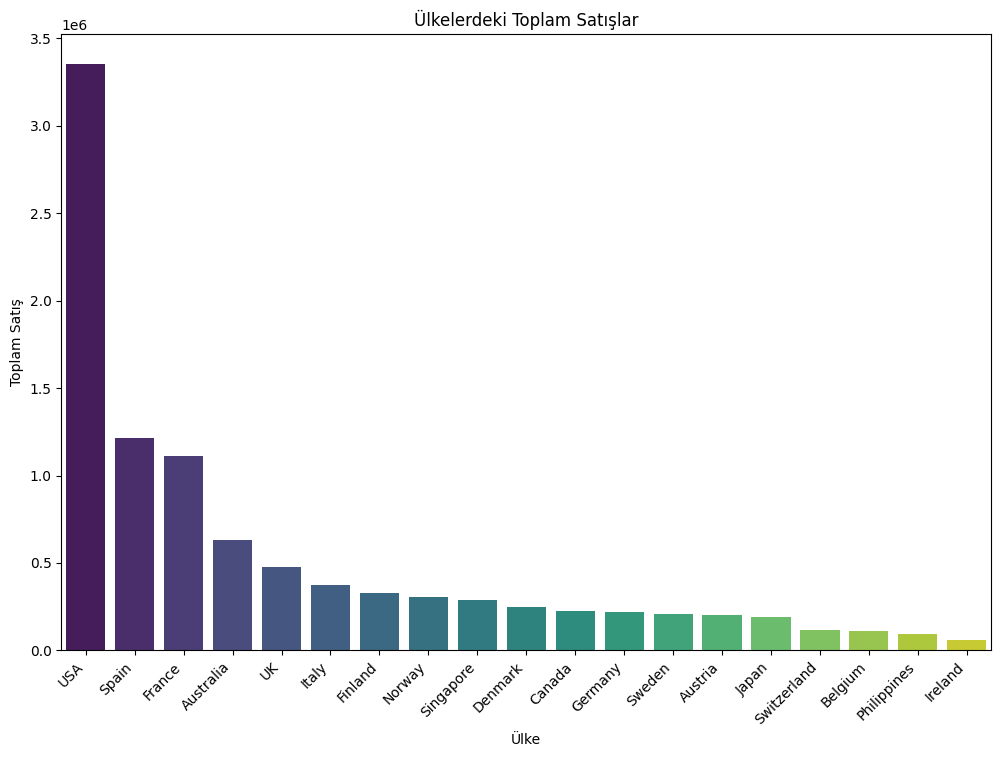

In [17]:
# Her bir ülkedeki toplam satış miktarını hesapla ve sırala
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

# Çubuk grafiği çizerek toplam satış miktarlarını gösterme
plt.figure(figsize=(12, 8))
sns.barplot(x=total_sales_by_country.index, y=total_sales_by_country.values, palette='viridis')
plt.xlabel('Ülke')
plt.ylabel('Toplam Satış')
plt.title('Ülkelerdeki Toplam Satışlar')
plt.xticks(rotation=45, ha='right')
plt.show()


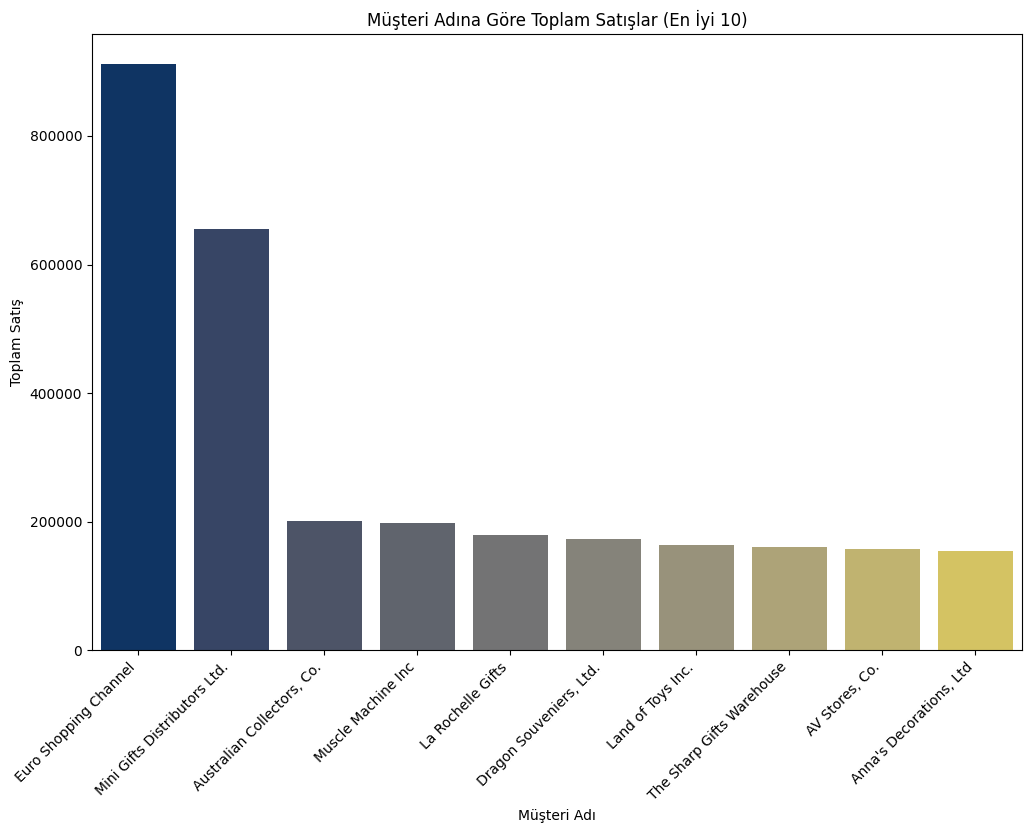

In [18]:
# Müşteri adına göre en yüksek toplam satışları hesapla, sırala ve ilk 10'u al
total_sales_by_customer = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

# Çubuk grafiği çizerek müşteri adına göre toplam satışları gösterme
plt.figure(figsize=(12, 8))
sns.barplot(x=total_sales_by_customer.index, y=total_sales_by_customer.values, palette='cividis')
plt.xlabel('Müşteri Adı')
plt.ylabel('Toplam Satış')
plt.title('Müşteri Adına Göre Toplam Satışlar (En İyi 10)')
plt.xticks(rotation=45, ha='right')
plt.show()


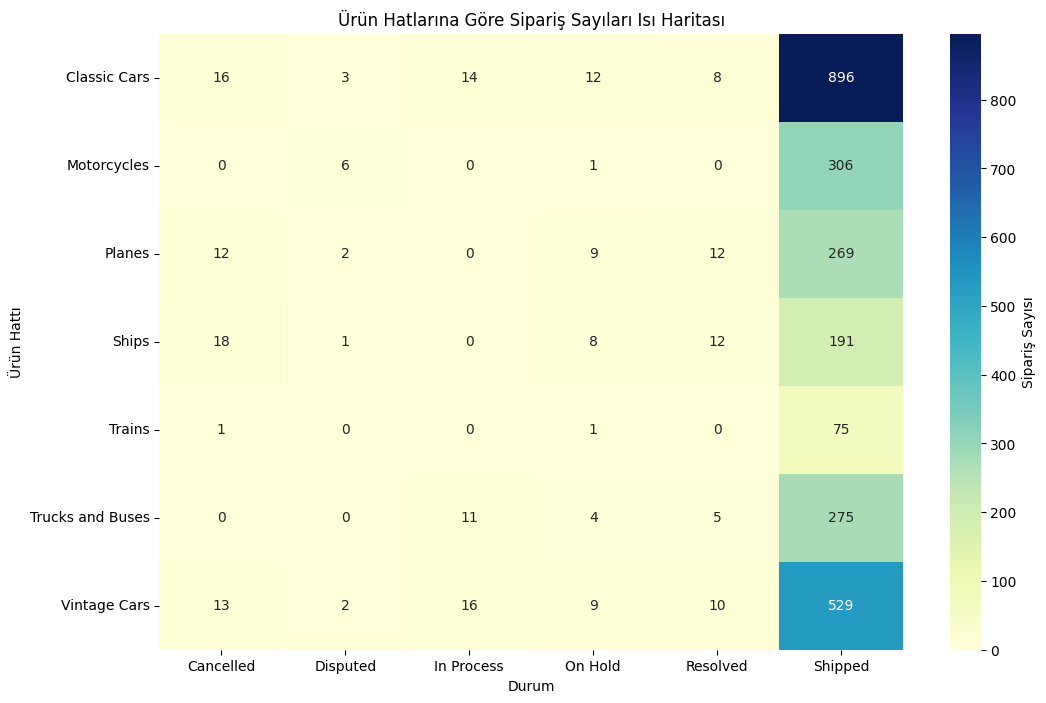

In [19]:
# Ürün hatlarına ve sipariş durumlarına göre sipariş sayılarını içeren bir ısı haritası oluştur
order_count_heatmap = df.pivot_table(index='PRODUCTLINE', columns='STATUS', values='ORDERNUMBER', aggfunc='count', fill_value=0)

# Isı haritasını çizerek ürün hatlarına göre sipariş sayılarını gösterme
plt.figure(figsize=(12, 8))
sns.heatmap(order_count_heatmap, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Sipariş Sayısı'})
plt.xlabel('Durum')
plt.ylabel('Ürün Hattı')
plt.title('Ürün Hatlarına Göre Sipariş Sayıları Isı Haritası')
plt.show()


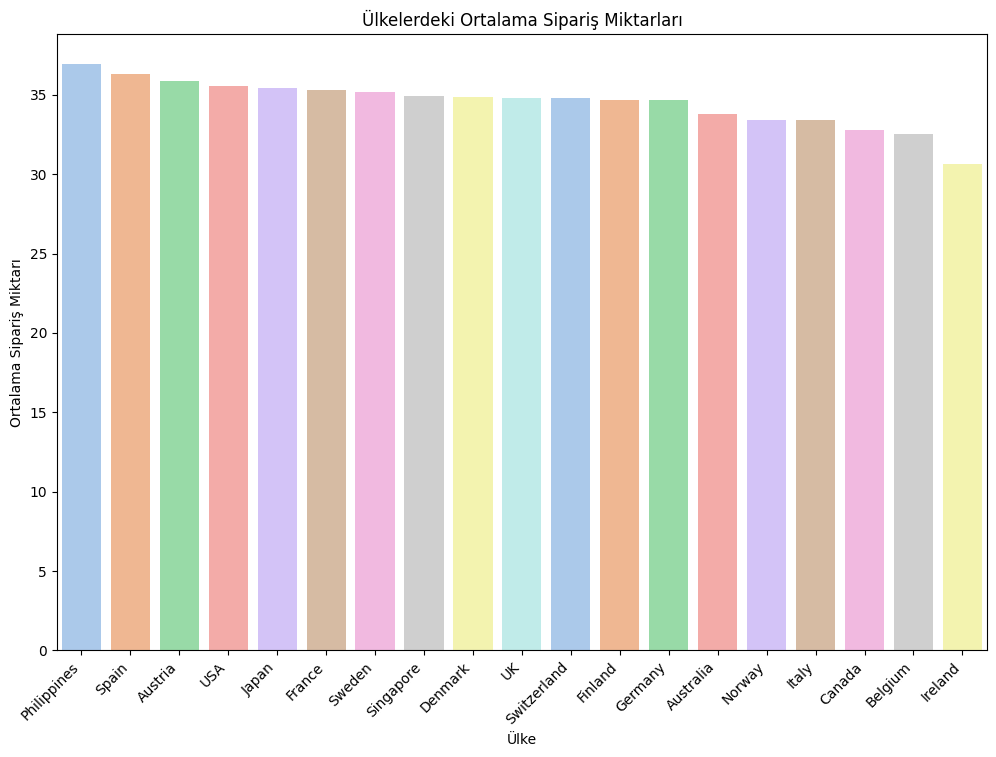

In [20]:
# Her bir ülkedeki ortalama sipariş miktarını hesapla ve sırala
avg_order_quantity_by_country = df.groupby('COUNTRY')['QUANTITYORDERED'].mean().sort_values(ascending=False)

# Çubuk grafiği çizerek ülkelerdeki ortalama sipariş miktarlarını gösterme
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_order_quantity_by_country.index, y=avg_order_quantity_by_country.values, palette='pastel')
plt.xlabel('Ülke')
plt.ylabel('Ortalama Sipariş Miktarı')
plt.title('Ülkelerdeki Ortalama Sipariş Miktarları')
plt.xticks(rotation=45, ha='right')
plt.show()


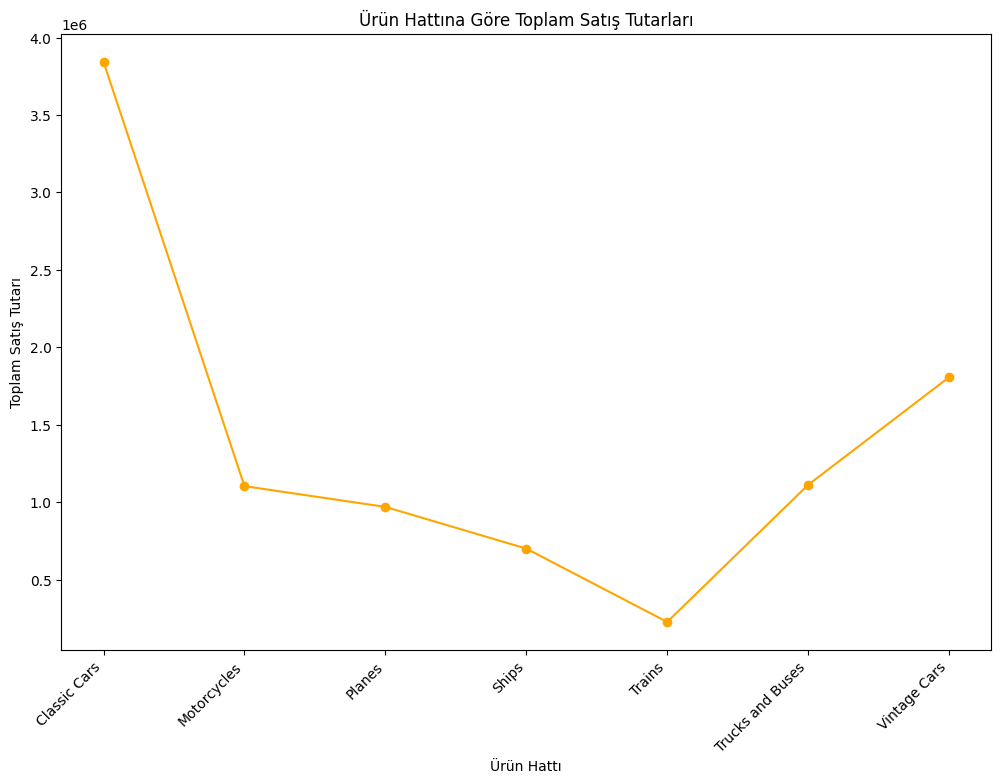

In [21]:
# Her bir ürün hattına göre toplam satış tutarını hesapla
sales_by_line = df.groupby('PRODUCTLINE')['SALES'].sum()

plt.figure(figsize=(12, 8))
sales_by_line.plot(kind='line', marker='o', color='orange')
plt.xlabel('Ürün Hattı')
plt.ylabel('Toplam Satış Tutarı')
plt.title('Ürün Hattına Göre Toplam Satış Tutarları')
plt.xticks(rotation=45, ha='right')
plt.show()


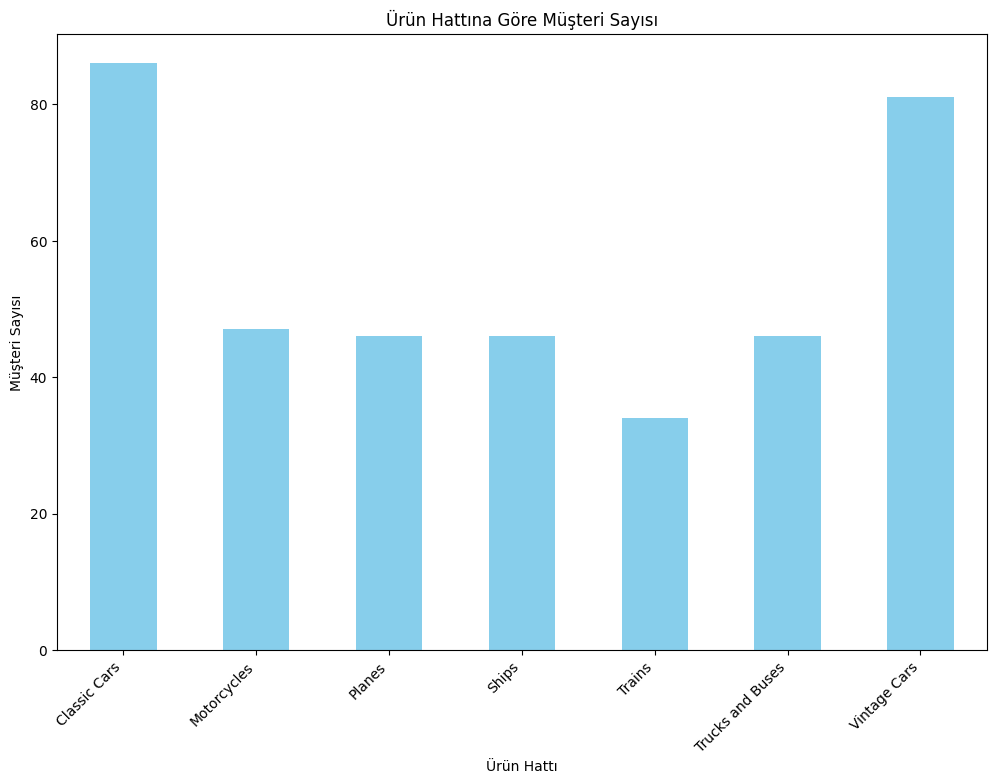

In [22]:
customer_count_by_line = df.groupby('PRODUCTLINE')['CUSTOMERNAME'].nunique()

plt.figure(figsize=(12, 8))
customer_count_by_line.plot(kind='bar', color='skyblue')
plt.xlabel('Ürün Hattı')
plt.ylabel('Müşteri Sayısı')
plt.title('Ürün Hattına Göre Müşteri Sayısı')
plt.xticks(rotation=45, ha='right')
plt.show()


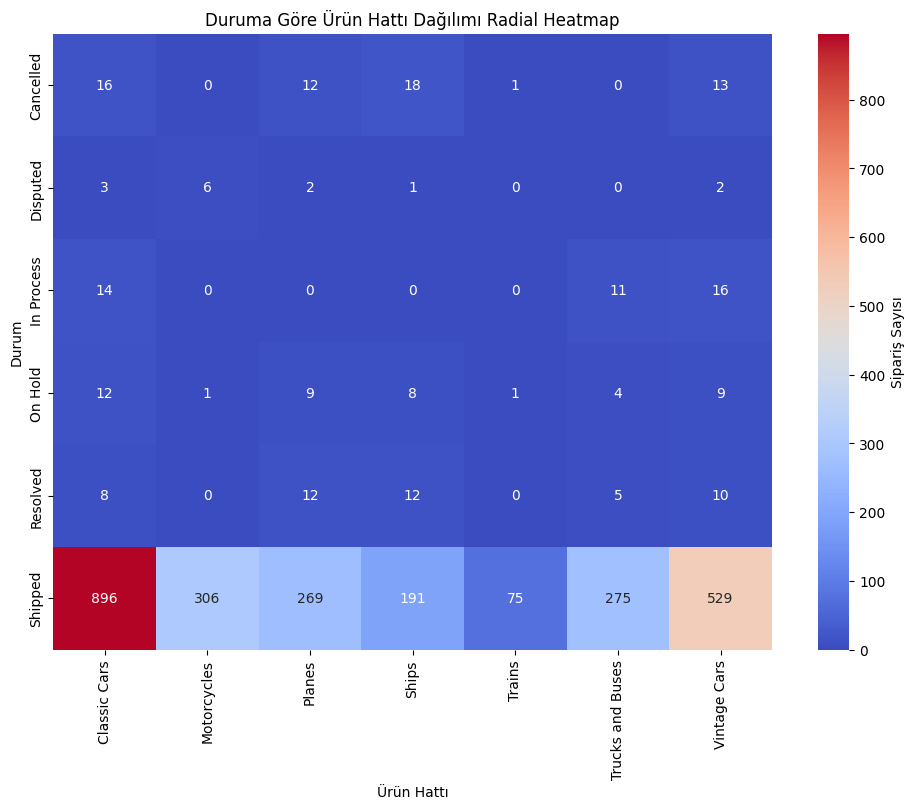

In [23]:
# Her bir ürün hattındaki farklı müşteri sayılarını içeren çubuk grafiğini oluştur
status_productline_pivot = df.pivot_table(index='STATUS', columns='PRODUCTLINE', values='ORDERNUMBER', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(status_productline_pivot, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Sipariş Sayısı'}, square=True)
plt.xlabel('Ürün Hattı')
plt.ylabel('Durum')
plt.title('Duruma Göre Ürün Hattı Dağılımı Radial Heatmap')
plt.show()


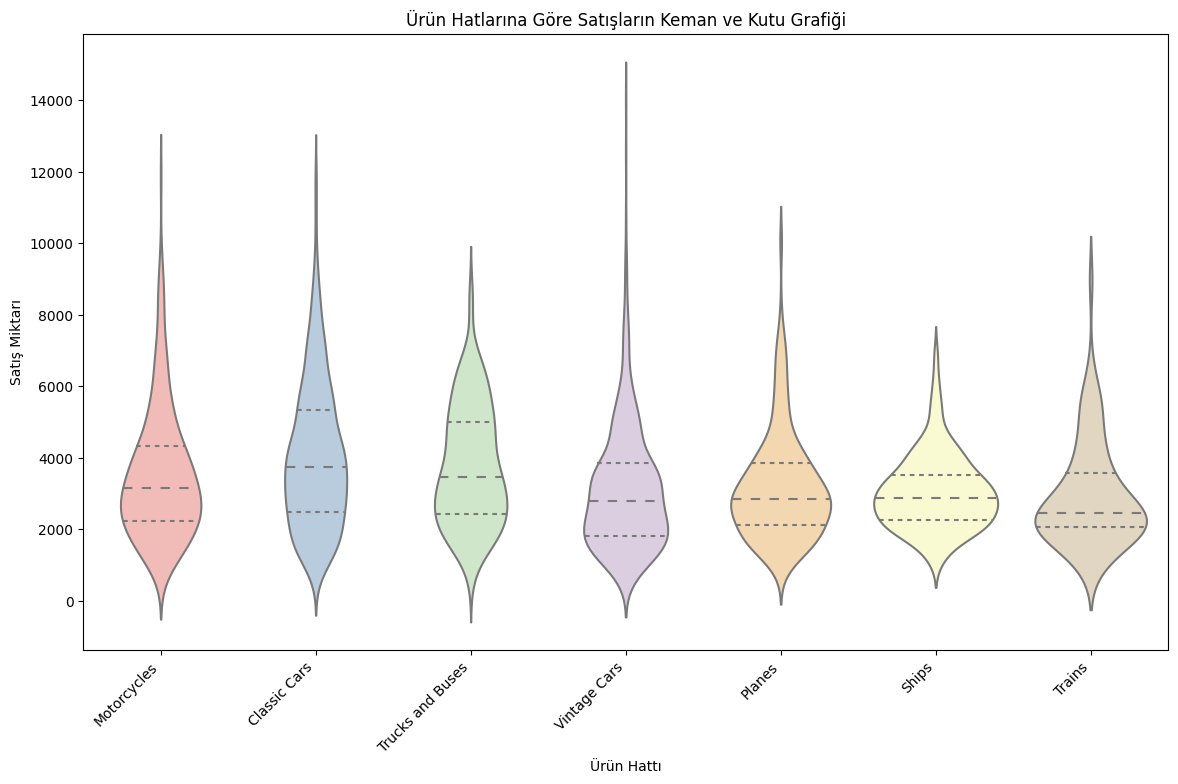

In [24]:
# Her bir ürün hattına göre satışların dağılımını gösteren keman ve kutu grafiğini çiz
plt.figure(figsize=(14, 8))
sns.violinplot(x='PRODUCTLINE', y='SALES', data=df, inner='quartile', palette='Pastel1')
plt.xlabel('Ürün Hattı')
plt.ylabel('Satış Miktarı')
plt.title('Ürün Hatlarına Göre Satışların Keman ve Kutu Grafiği')
plt.xticks(rotation=45, ha='right')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


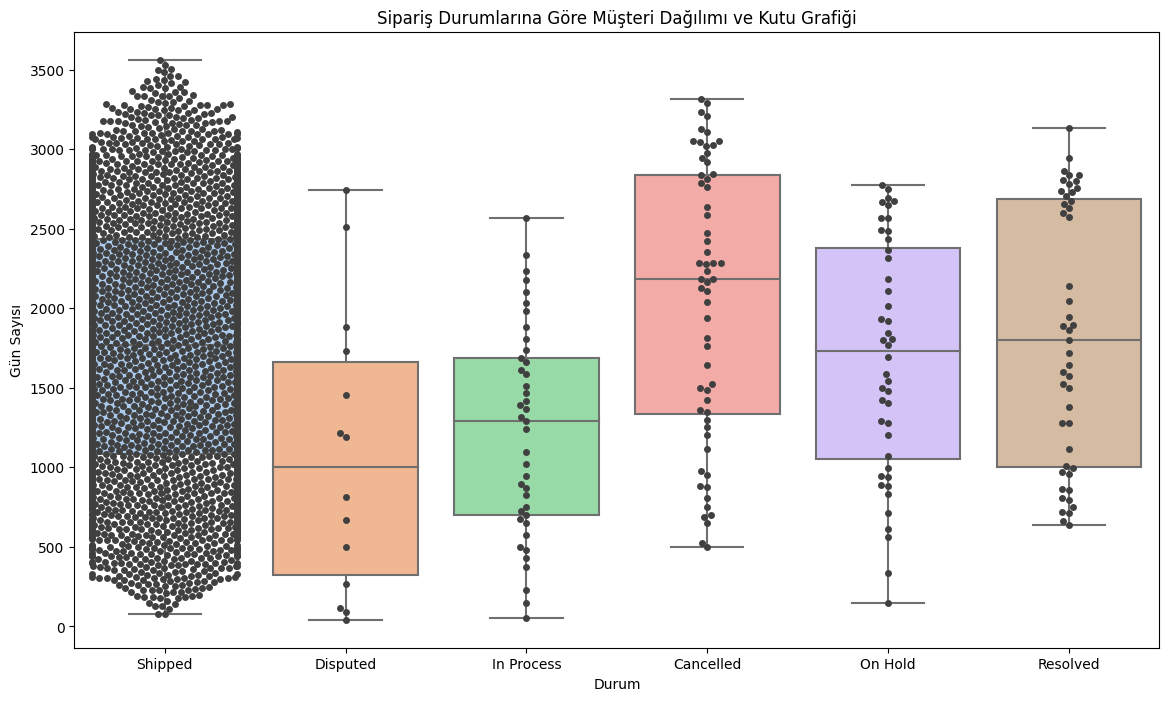

In [25]:
# Sipariş durumlarına göre müşteri dağılımını ve kutu grafiğini gösteren çiftli bir grafik çiz
plt.figure(figsize=(14, 8))
sns.boxplot(x='STATUS', y='DAYS_SINCE_LASTORDER', data=df, palette='pastel')
sns.swarmplot(x='STATUS', y='DAYS_SINCE_LASTORDER', data=df, color='0.25')
plt.xlabel('Durum')
plt.ylabel('Gün Sayısı')
plt.title('Sipariş Durumlarına Göre Müşteri Dağılımı ve Kutu Grafiği')
plt.show()


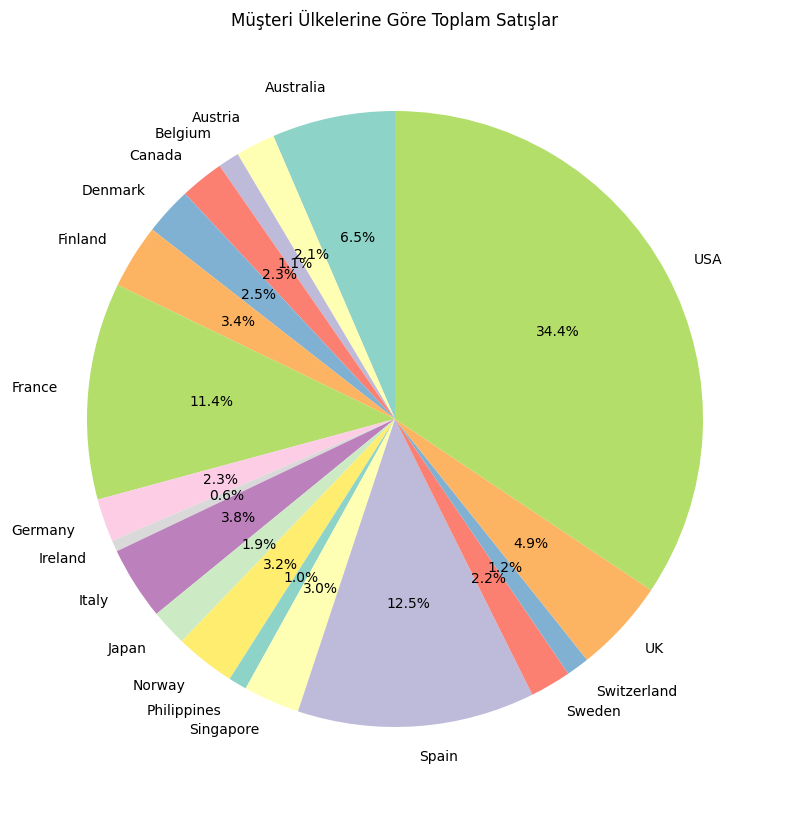

In [26]:
# Müşteri ülkelerine göre toplam satışları içeren pasta grafiğini çiz
country_sales_pie = df.groupby('COUNTRY')['SALES'].sum()

plt.figure(figsize=(10, 10))
plt.pie(country_sales_pie, labels=country_sales_pie.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Müşteri Ülkelerine Göre Toplam Satışlar')
plt.show()


<ipython-input-27-82f0030dff52>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='COUNTRY', y='SALES', hue='PRODUCTLINE', data=df, ci=None, palette='husl')


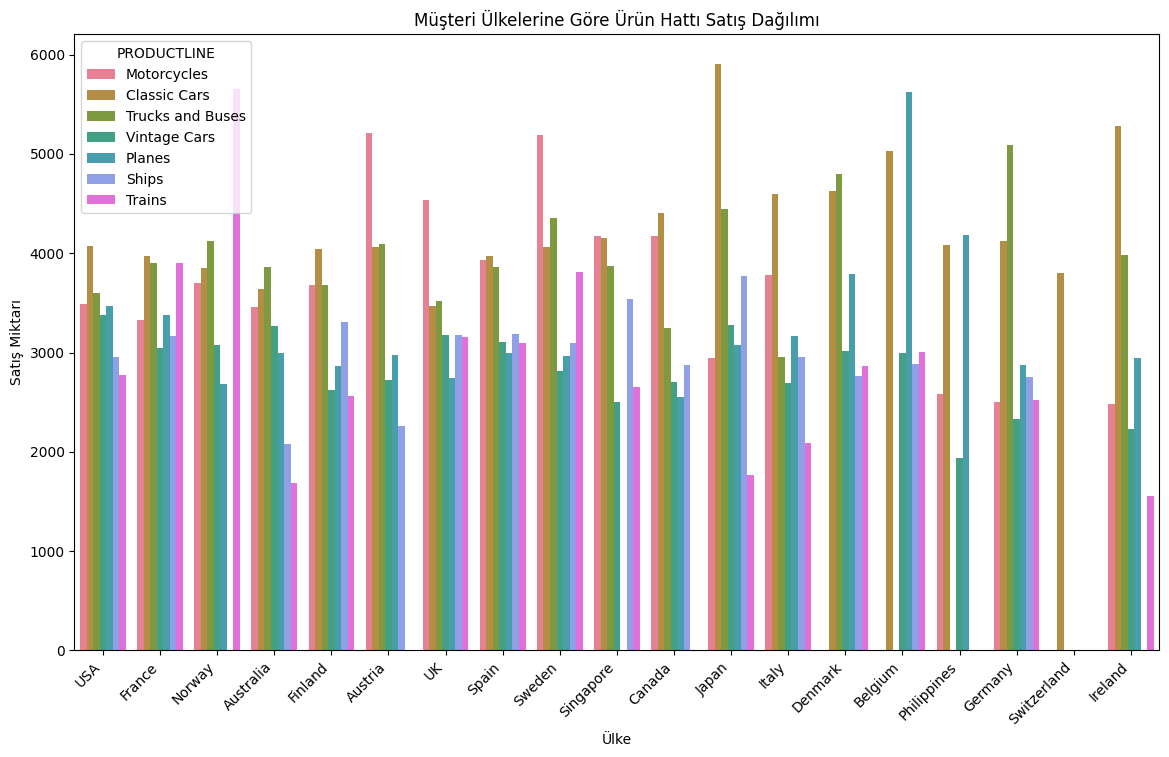

In [27]:
# Müşteri ülkelerine göre ürün hatlarına ait satış miktarlarını içeren çoklu çubuk grafiğini çiz
plt.figure(figsize=(14, 8))
sns.barplot(x='COUNTRY', y='SALES', hue='PRODUCTLINE', data=df, ci=None, palette='husl')
plt.xlabel('Ülke')
plt.ylabel('Satış Miktarı')
plt.title('Müşteri Ülkelerine Göre Ürün Hattı Satış Dağılımı')
plt.xticks(rotation=45, ha='right')
plt.show()
